# Package loading and basic configurations

In [5]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

Comment(Mateen): Changed Bounding Box Area

In [6]:
bbox = BboxSelector([
    6.001165771484375, # min_x
    50.00807412325402, # min_y
    8.008200988769531, # max_x
    52.00261482608728  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df

C:\Users\Sony\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,CO2.unit,CO2.value,Calculated MAF.unit,Calculated MAF.value,Consumption.unit,Consumption.value,Engine Load.unit,Engine Load.value,GPS Accuracy.unit,GPS Accuracy.value,...,sensor.fuelType,sensor.id,sensor.manufacturer,sensor.model,sensor.type,time,track.begin,track.end,track.id,track.length
0,kg/h,4.329332,g/s,5.604336,l/h,1.842269,%,35.979184,%,3.790092,...,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:26:02,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448
1,kg/h,6.601084,g/s,8.545127,l/h,2.808972,%,52.609092,%,3.790093,...,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:26:07,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448
2,kg/h,4.082690,g/s,5.285056,l/h,1.737315,%,31.372550,%,3.790092,...,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:26:13,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448
3,kg/h,4.014871,g/s,5.197264,l/h,1.708456,%,31.996800,%,3.790092,...,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:26:18,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448
4,kg/h,4.066720,g/s,5.264383,l/h,1.730519,%,32.080061,%,3.790092,...,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:26:23,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,NaN,NaN,NaN,NaN,NaN,NaN,%,18.431372,%,8.000000,...,gasoline,5d0094c444ea850302a867b7,Mercedes Benz,C180 W204,car,2020-03-18T10:59:26,2020-03-18T10:56:55Z,2020-03-18T10:59:46Z,5e78e2b865b80c5d6be80e83,1.805394
31,NaN,NaN,NaN,NaN,NaN,NaN,%,13.274706,%,7.566406,...,gasoline,5d0094c444ea850302a867b7,Mercedes Benz,C180 W204,car,2020-03-18T10:59:31,2020-03-18T10:56:55Z,2020-03-18T10:59:46Z,5e78e2b865b80c5d6be80e83,1.805394
32,NaN,NaN,NaN,NaN,NaN,NaN,%,65.488910,%,7.000000,...,gasoline,5d0094c444ea850302a867b7,Mercedes Benz,C180 W204,car,2020-03-18T10:59:36,2020-03-18T10:56:55Z,2020-03-18T10:59:46Z,5e78e2b865b80c5d6be80e83,1.805394
33,NaN,NaN,NaN,NaN,NaN,NaN,%,0.000000,%,5.000000,...,gasoline,5d0094c444ea850302a867b7,Mercedes Benz,C180 W204,car,2020-03-18T10:59:41,2020-03-18T10:56:55Z,2020-03-18T10:59:46Z,5e78e2b865b80c5d6be80e83,1.805394


Comment(Mateen): To See All Columns

In [7]:
pd.set_option('display.max_columns', None)
track_df.head()

,CO2.unit,CO2.value,Calculated MAF.unit,Calculated MAF.value,Consumption.unit,Consumption.value,Engine Load.unit,Engine Load.value,GPS Accuracy.unit,GPS Accuracy.value,GPS Altitude.unit,GPS Altitude.value,GPS Bearing.unit,GPS Bearing.value,GPS HDOP.unit,GPS HDOP.value,GPS PDOP.unit,GPS PDOP.value,GPS Speed.unit,GPS Speed.value,GPS VDOP.unit,GPS VDOP.value,Intake Pressure.unit,Intake Pressure.value,Intake Temperature.unit,Intake Temperature.value,MAF.unit,MAF.value,O2 Lambda Voltage ER.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage.unit,O2 Lambda Voltage.value,Rpm.unit,Rpm.value,Speed.unit,Speed.value,Throttle Position.unit,Throttle Position.value,geometry,id,sensor.constructionYear,sensor.engineDisplacement,sensor.fuelType,sensor.id,sensor.manufacturer,sensor.model,sensor.type,time,track.begin,track.end,track.id,track.length
0,kg/h,4.329332,g/s,5.604336,l/h,1.842269,%,35.979184,%,3.790092,m,101.479695,deg,89.216932,NaN,NaN,NaN,NaN,km/h,50.456486,NaN,NaN,kPa,40.999999,c,42.999999,NaN,NaN,NaN,NaN,NaN,NaN,u/min,1612.633333,km/h,50.814579,%,13.000000,POINT (7.77562 51.66562),5e8ea6ff65b80c5d6bd4d7d7,2005,1086,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:26:02,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448
1,kg/h,6.601084,g/s,8.545127,l/h,2.808972,%,52.609092,%,3.790093,m,103.439300,deg,89.654948,NaN,NaN,NaN,NaN,km/h,54.353275,NaN,NaN,kPa,59.000001,c,43.000001,NaN,NaN,NaN,NaN,NaN,NaN,u/min,1708.684261,km/h,54.000000,%,15.645863,POINT (7.77666 51.66562),5e8ea6ff65b80c5d6bd4d7d9,2005,1086,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:26:07,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448
2,kg/h,4.082690,g/s,5.285056,l/h,1.737315,%,31.372550,%,3.790092,m,102.729004,deg,88.951341,NaN,NaN,NaN,NaN,km/h,53.140869,NaN,NaN,kPa,37.000001,c,42.999999,NaN,NaN,NaN,NaN,NaN,NaN,u/min,1685.167900,km/h,53.000000,%,12.000000,POINT (7.77775 51.66563),5e8ea6ff65b80c5d6bd4d7da,2005,1086,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:26:13,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448
3,kg/h,4.014871,g/s,5.197264,l/h,1.708456,%,31.996800,%,3.790092,m,102.824218,deg,89.300002,NaN,NaN,NaN,NaN,km/h,52.210818,NaN,NaN,kPa,37.000000,c,43.000001,NaN,NaN,NaN,NaN,NaN,NaN,u/min,1657.175061,km/h,51.057102,%,12.000000,POINT (7.77881 51.66564),5e8ea6ff65b80c5d6bd4d7db,2005,1086,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:26:18,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448
4,kg/h,4.066720,g/s,5.264383,l/h,1.730519,%,32.080061,%,3.790092,m,102.669197,deg,89.988955,NaN,NaN,NaN,NaN,km/h,51.491928,NaN,NaN,kPa,38.000000,c,43.000001,NaN,NaN,NaN,NaN,NaN,NaN,u/min,1634.403298,km/h,51.000002,%,12.000000,POINT (7.77985 51.66564),5e8ea6ff65b80c5d6bd4d7dc,2005,1086,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:26:23,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448


Comment(Mateen): Summary Statistics

In [8]:
track_df.describe()

,CO2.value,Calculated MAF.value,Consumption.value,Engine Load.value,GPS Accuracy.value,GPS Altitude.value,GPS Bearing.value,GPS HDOP.value,GPS PDOP.value,GPS Speed.value,GPS VDOP.value,Intake Pressure.value,Intake Temperature.value,MAF.value,O2 Lambda Voltage ER.value,O2 Lambda Voltage.value,Rpm.value,Speed.value,Throttle Position.value,sensor.constructionYear,sensor.engineDisplacement,track.length
count,6519.000000,6421.000000,6519.000000,6712.000000,7075.000000,7075.000000,6523.000000,3498.000000,3498.000000,7074.000000,3498.000000,6519.000000,6519.000000,98.000000,98.000000,98.000000,6713.000000,6713.000000,6519.000000,7075.000000,7075.000000,7075.000000
mean,10.102462,13.158456,4.298920,39.186691,3.554476,100.543779,166.381825,0.672399,1.190053,54.164624,0.928288,50.181448,25.781012,7.784690,1.021759,1.998997,1808.956345,53.356430,15.892337,2007.269823,1375.379223,57.339978
std,10.052445,13.081885,4.277636,23.283126,3.486048,18.663738,102.373880,3.338924,4.714015,42.308884,3.333809,22.824900,8.929785,4.821435,0.142806,0.168455,850.973710,41.467577,10.196726,3.986156,321.589220,70.590249
min,-2.563380,-3.318304,-1.090800,-495.792866,1.000000,34.999999,-173.870739,0.400000,0.800000,-655.473402,0.600000,14.717986,1.000000,2.602102,0.909198,1.673462,-183.913050,-1.721116,0.000000,2005.000000,1086.000000,0.000000
25%,2.719844,3.505356,1.157380,23.586995,1.844041,93.187556,68.003370,0.400000,0.800000,25.395592,0.600000,31.000000,17.999999,3.952932,0.990079,1.955352,1218.734815,24.744055,6.514945,2005.000000,1086.000000,3.449088
50%,5.200442,6.703639,2.212954,32.978042,3.790092,104.641157,182.735031,0.457703,1.000000,45.062598,0.800000,44.778177,27.000000,7.114416,0.997015,1.983653,1639.772857,44.008131,14.110945,2005.000000,1086.000000,12.520316
75%,14.224878,18.640085,6.053140,55.298287,3.790093,110.774997,242.473141,0.700000,1.100000,77.752623,0.800000,68.000000,33.000000,8.596116,1.006094,2.005369,2162.602650,76.000001,21.539424,2007.000000,1798.000000,142.209935
max,55.452073,71.782905,23.596627,100.000003,143.448941,183.000000,590.839000,99.000002,140.000003,150.987239,99.000002,195.828742,45.999999,29.381001,1.833224,2.974818,3918.899066,373.333340,89.000003,2018.000000,1798.000000,169.237435


Comment(Mateen): Describing only One Column

In [9]:
track_df['Speed.value'].describe()

count    6713.000000
mean       53.356430
std        41.467577
min        -1.721116
25%        24.744055
50%        44.008131
75%        76.000001
max       373.333340
Name: Speed.value, dtype: float64

Comment(Mateen): Observing Info

In [10]:
track_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7075 entries, 0 to 34
Data columns (total 52 columns):
CO2.unit                      6519 non-null object
CO2.value                     6519 non-null float64
Calculated MAF.unit           6421 non-null object
Calculated MAF.value          6421 non-null float64
Consumption.unit              6519 non-null object
Consumption.value             6519 non-null float64
Engine Load.unit              6712 non-null object
Engine Load.value             6712 non-null float64
GPS Accuracy.unit             7075 non-null object
GPS Accuracy.value            7075 non-null float64
GPS Altitude.unit             7075 non-null object
GPS Altitude.value            7075 non-null float64
GPS Bearing.unit              6523 non-null object
GPS Bearing.value             6523 non-null float64
GPS HDOP.unit                 3498 non-null object
GPS HDOP.value                3498 non-null float64
GPS PDOP.unit                 3498 non-null object
GPS PDOP.val

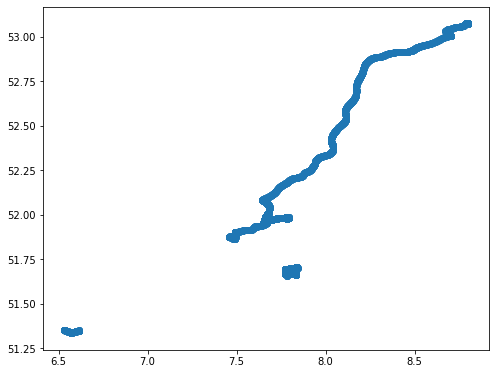

In [12]:
track_df.plot(figsize=(8, 10))

# Inspecting a single Track

Comment(Mateen): Extracting all columns. Quering one particular track id

In [13]:
pd.set_option('display.max_columns', None)
track_df[track_df['track.id']=='5e8ea6ff65b80c5d6bd4d7d5']

,CO2.unit,CO2.value,Calculated MAF.unit,Calculated MAF.value,Consumption.unit,Consumption.value,Engine Load.unit,Engine Load.value,GPS Accuracy.unit,GPS Accuracy.value,GPS Altitude.unit,GPS Altitude.value,GPS Bearing.unit,GPS Bearing.value,GPS HDOP.unit,GPS HDOP.value,GPS PDOP.unit,GPS PDOP.value,GPS Speed.unit,GPS Speed.value,GPS VDOP.unit,GPS VDOP.value,Intake Pressure.unit,Intake Pressure.value,Intake Temperature.unit,Intake Temperature.value,MAF.unit,MAF.value,O2 Lambda Voltage ER.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage.unit,O2 Lambda Voltage.value,Rpm.unit,Rpm.value,Speed.unit,Speed.value,Throttle Position.unit,Throttle Position.value,geometry,id,sensor.constructionYear,sensor.engineDisplacement,sensor.fuelType,sensor.id,sensor.manufacturer,sensor.model,sensor.type,time,track.begin,track.end,track.id,track.length
0,kg/h,4.329332,g/s,5.604336,l/h,1.842269,%,35.979184,%,3.790092,m,101.479695,deg,89.216932,NaN,NaN,NaN,NaN,km/h,50.456486,NaN,NaN,kPa,40.999999,c,42.999999,NaN,NaN,NaN,NaN,NaN,NaN,u/min,1612.633333,km/h,50.814579,%,13.000000,POINT (7.77562 51.66562),5e8ea6ff65b80c5d6bd4d7d7,2005,1086,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:26:02,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448
1,kg/h,6.601084,g/s,8.545127,l/h,2.808972,%,52.609092,%,3.790093,m,103.439300,deg,89.654948,NaN,NaN,NaN,NaN,km/h,54.353275,NaN,NaN,kPa,59.000001,c,43.000001,NaN,NaN,NaN,NaN,NaN,NaN,u/min,1708.684261,km/h,54.000000,%,15.645863,POINT (7.77666 51.66562),5e8ea6ff65b80c5d6bd4d7d9,2005,1086,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:26:07,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448
2,kg/h,4.082690,g/s,5.285056,l/h,1.737315,%,31.372550,%,3.790092,m,102.729004,deg,88.951341,NaN,NaN,NaN,NaN,km/h,53.140869,NaN,NaN,kPa,37.000001,c,42.999999,NaN,NaN,NaN,NaN,NaN,NaN,u/min,1685.167900,km/h,53.000000,%,12.000000,POINT (7.77775 51.66563),5e8ea6ff65b80c5d6bd4d7da,2005,1086,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:26:13,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448
3,kg/h,4.014871,g/s,5.197264,l/h,1.708456,%,31.996800,%,3.790092,m,102.824218,deg,89.300002,NaN,NaN,NaN,NaN,km/h,52.210818,NaN,NaN,kPa,37.000000,c,43.000001,NaN,NaN,NaN,NaN,NaN,NaN,u/min,1657.175061,km/h,51.057102,%,12.000000,POINT (7.77881 51.66564),5e8ea6ff65b80c5d6bd4d7db,2005,1086,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:26:18,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448
4,kg/h,4.066720,g/s,5.264383,l/h,1.730519,%,32.080061,%,3.790092,m,102.669197,deg,89.988955,NaN,NaN,NaN,NaN,km/h,51.491928,NaN,NaN,kPa,38.000000,c,43.000001,NaN,NaN,NaN,NaN,NaN,NaN,u/min,1634.403298,km/h,51.000002,%,12.000000,POINT (7.77985 51.66564),5e8ea6ff65b80c5d6bd4d7dc,2005,1086,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:26:23,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,kg/h,1.946759,g/s,2.520087,l/h,0.828408,%,21.167524,%,3.790092,m,97.658535,deg,128.003418,NaN,NaN,NaN,NaN,km/h,22.858878,NaN,NaN,kPa,25.178707,c,43.000001,NaN,NaN,NaN,NaN,NaN,NaN,u/min,1180.802819,km/h,20.913499,%,6.000000,POINT (7.80959 51.68091),5e8ea6ff65b80c5d6bd4d836,2005,1086,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:33:56,2020-04-08T10:26:02Z,2020-04-08T10:34:16Z,5e8ea6ff65b80c5d6bd4d7d5,3.942448
95,kg/h,1.264362,g/s,1.636721,l/h,0.538026,%,13.732753,%,4.006918,m,98.264392,deg,205.718009,NaN,NaN,NaN,NaN,km/h,18.086473,NaN,NaN,kPa,17.999999,c,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,u/min,1072.747304,km/h,19.990683,%,6.000000,POINT (7.80961 51.68071),5e8ea6ff65b80c5d6bd4d837,2005,1086,gasoline,5c93d26a44ea8503020fd5ef,KIA,Picanto,car,2020-04-08T10:34:01,

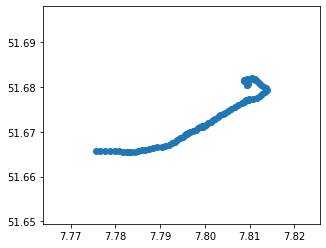

In [14]:
some_track = track_df[track_df['track.id'] == '5e8ea6ff65b80c5d6bd4d7d5']
some_track.plot()

Comment(Mateen): Adding Histogram of one column for a single track id

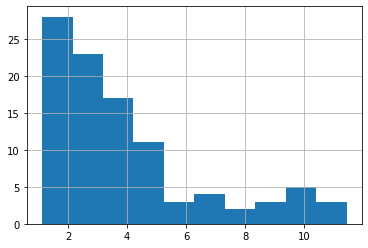

In [15]:
some_track = track_df[track_df['track.id'] == '5e8ea6ff65b80c5d6bd4d7d5']
some_attribute = some_track['CO2.value']
some_attribute.hist()

Comment(Mateen): Plotting Speed Value against time for single track

C:\Users\Sony\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


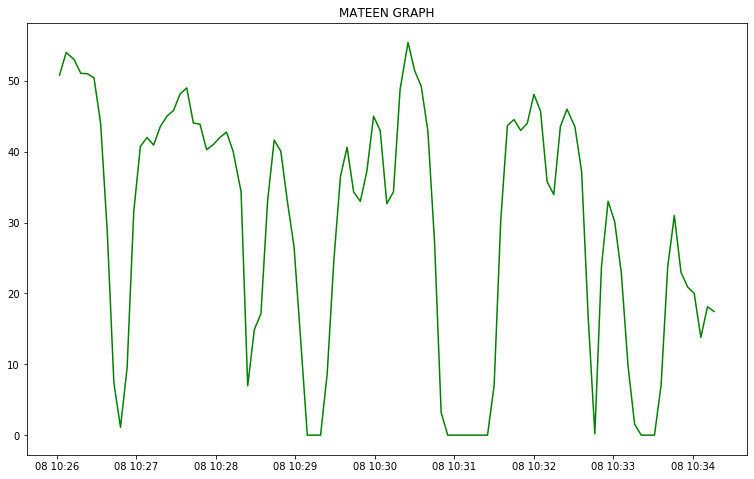

In [16]:
from matplotlib import pyplot as plt
some_track = track_df[track_df['track.id'] == '5e8ea6ff65b80c5d6bd4d7d5']
some_attribute = some_track['time']
some_time = pd.to_datetime(some_attribute)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0,0,1,1])
ax1.set_title('MATEEN GRAPH')
ax1.plot(some_time, some_track['Speed.value'],color='green')
plt.show()

In [17]:
track_df['track.id'].unique()[4]

'5e8ea6fe65b80c5d6bd4d4b6'

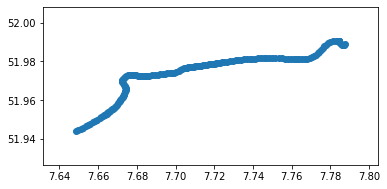

In [18]:
some_track_id = track_df['track.id'].unique()[13]
some_track = track_df[track_df['track.id'] == some_track_id]
some_track.plot()

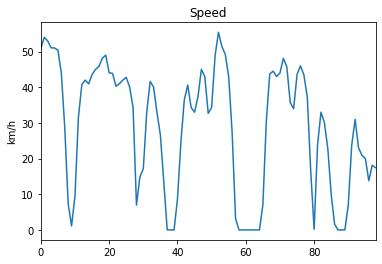

In [19]:
some_track = track_df[track_df['track.id'] == '5e8ea6ff65b80c5d6bd4d7d5']
ax = some_track['Speed.value'].plot()
ax.set_title("Speed")
ax.set_ylabel(some_track['Speed.unit'][0])
ax

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [20]:
import folium

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=13)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='blue').add_to(m)
m

# Example: Visualization with pydeck (deck.gl)

The pydeck library makes use of the basemap tiles from Mapbox. In case you want to visualize the map with basemap tiles, you need to register with MapBox, and configure a specific access token. The service is free until a certain level of traffic is esceeded.

You can either configure it via your terminal (i.e. `export MAPBOX_API_KEY=<mapbox-key-here>`), which pydeck will automatically read, or you can pass it as a variable to the generation of pydeck (i.e. `pdk.Deck(mapbox_key=<mapbox-key-here>, ...)`.

In [21]:
import pydeck as pdk

# for pydeck the attributes have to be flat
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(track_df)
vis_df['speed'] = vis_df['Speed.value']

# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=10,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 140]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=7.5963592529296875,
    latitude=51.96246168188569,
    zoom=10,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state, mapbox_key='pk.eyJ1IjoibXVoYW1tYWRtYXRlZW4iLCJhIjoiY2s4eDgyODBvMHhrdzNybzd1ZWc0aTNsMCJ9.y9oYjrB5O2aJmP2z5LzgnA'
)
r.to_html('tracks_muenster.html', iframe_width=900)

'C:\\Users\\Sony\\Documents\\Study Project\\envirocar-py-master\\examples\\tracks_muenster.html'